In [5]:
import numpy as np
import pandas as pd
from numpy import convolve
import matplotlib.pyplot as plt


In [6]:
def moving_fun(dataframe, col, blanking, duration, newname='movmin', fun=min):
    """blanking: # timepoints between 'now' and evaluation. duration: # timepoints to evaluate"""
    dataframe[newname] = np.nan
    colidx = list(dataframe.columns).index(col)
    newnameidx = list(dataframe.columns).index(newname)
    datalen = len(dataframe)
    dataframe.iloc[blanking+duration:, newnameidx] = np.fromiter((fun(dataframe.iloc[idx:idx+duration, colidx])
                                                     for idx in range(datalen-blanking-duration)),
                                                     dtype=np.float64)

def percent_change(dataframe, col, newname='percent_change'):
    dataframe[newname] = 0
    newidx = list(dataframe.columns).index(newname)
    colidx = list(dataframe.columns).index(col)
    idcs_all = list(dataframe.index)
    dataframe.iloc[idcs_all[1:], newidx] = ((dataframe.iloc[idcs_all[1:], colidx].values -
                                              dataframe.iloc[idcs_all[:-1], colidx].values) /
                                             dataframe.iloc[idcs_all[1:], colidx].values)

def diff(dataframe, col, newname='percent_change'):
    dataframe[newname] = 0
    newidx = list(dataframe.columns).index(newname)
    colidx = list(dataframe.columns).index(col)
    idcs_all = list(dataframe.index)
    dataframe.iloc[idcs_all[1:], newidx] = (dataframe.iloc[idcs_all[1:], colidx].values -
                                            dataframe.iloc[idcs_all[:-1], colidx].values)


In [9]:
def read_data(filename):
    return pd.read_excel(filename)

def write_data(df, filename):
    df.to_excel(filename)

Index(['time', 'ask_vol', 'ask_spread_price', 'ask_closest_price',
       'ask_closest_vol', 'ask_weighted_mean_price', 'bid_vol',
       'bid_spread_price', 'bid_closest_price', 'bid_closest_vol',
       'bid_weighted_mean_price', 'ask_closestpromille_vol',
       'ask_num_closest_price', 'ask_stdovermean_price',
       'bid_closestpromille_vol', 'bid_num_closest_price',
       'bid_stdovermean_price'],
      dtype='object')


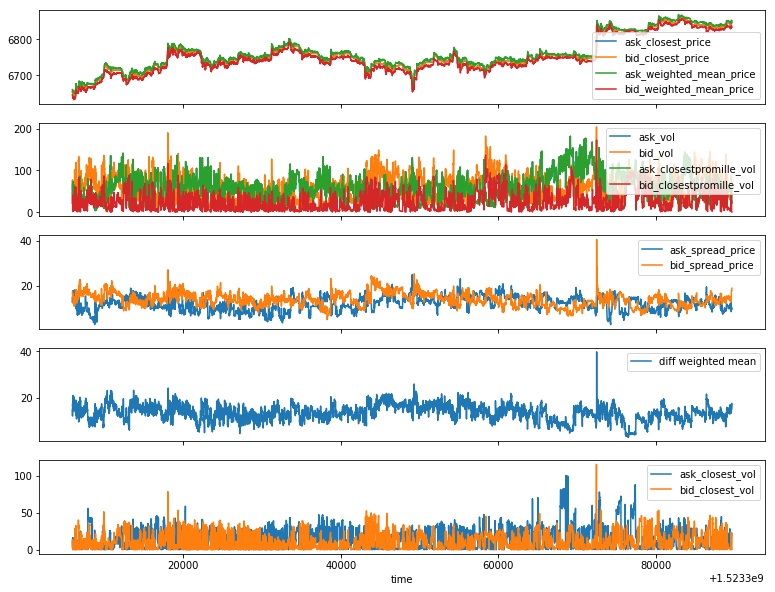

In [29]:
# plot time course

# enablo zooming into fig
%matplotlib inline
import mpld3
mpld3.enable_notebook()

ob = read_data('gdax_orderbook_2018-14.xlsx')
print(ob.columns)

fig, ax = plt.subplots(nrows=5, sharex=True)

ob.plot('time', 'ask_closest_price', ax=ax[0])
ob.plot('time', 'bid_closest_price', ax=ax[0])
ob.plot('time', 'ask_weighted_mean_price', ax=ax[0])
ob.plot('time', 'bid_weighted_mean_price', ax=ax[0])

ob.plot('time', 'ask_vol', ax=ax[1])
ob.plot('time', 'bid_vol', ax=ax[1])
ob.plot('time', 'ask_closestpromille_vol', ax=ax[1])
ob.plot('time', 'bid_closestpromille_vol', ax=ax[1])

ob['bid_spread_price'] = -ob['bid_spread_price']
ob.plot('time', 'ask_spread_price', ax=ax[2])
ob.plot('time', 'bid_spread_price', ax=ax[2])

# ax[3].plot(ob['time'], ob['ask_closest_price']-ob['bid_closest_price'], label='diff closest')
ax[3].plot(ob['time'], ob['ask_weighted_mean_price']-ob['bid_weighted_mean_price'], label='diff weighted mean')
ax[3].legend()

ob.plot('time', 'ask_closest_vol', ax=ax[4])
ob.plot('time', 'bid_closest_vol', ax=ax[4])


fig.set_size_inches(13, 10)
plt.show()